In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("Iris.csv")

In [22]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
data.shape

(150, 6)

In [26]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3fe657d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3fe663490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3fe657a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3fe663b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3fe663e50>],
 'means': []}

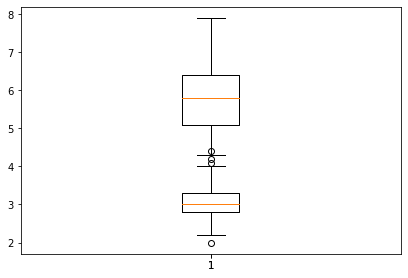

In [35]:
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
plt.boxplot(data['SepalLengthCm'])
plt.boxplot(data['SepalWidthCm'])


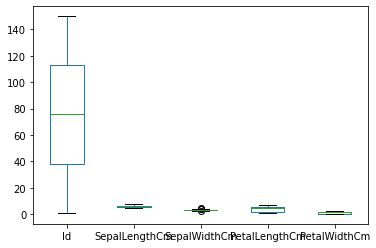

In [39]:
data.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3FE875040>,
      dtype=object)

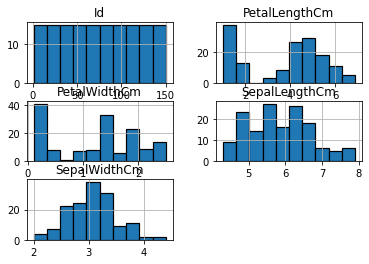

In [40]:
data.hist(edgecolor='black', linewidth=1.2)

#  Importing metrics for evaluation

In [42]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\dinesh kumar sirvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = classifier.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test) *100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 100.0


### Support vector machine

In [54]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test) *100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 100.0


### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 96.66666666666667


### K-Nearest Neighbours

In [57]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 100.0
